In [1]:
!pip install opendatasets --quiet

In [2]:
import opendatasets as od

url = "https://www.kaggle.com/competitions/kitchenware-classification/data"
od.download(url)

Skipping, found downloaded files in "./kitchenware-classification" (use force=True to force download)


In [3]:
!ls -l ./kitchenware-classification

total 388
drwxr-xr-x 2 root root 258048 Dec 14 09:56 images
-rw-r--r-- 1 root root  43524 Dec 14 09:56 sample_submission.csv
-rw-r--r-- 1 root root  22852 Dec 14 09:56 test.csv
-rw-r--r-- 1 root root  63891 Dec 14 09:56 train.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

train_df = pd.read_csv("./kitchenware-classification/train.csv", dtype=str)
test_df = pd.read_csv("./kitchenware-classification/test.csv", dtype=str)
submit_df = pd.read_csv("./kitchenware-classification/sample_submission.csv")

In [5]:
print(train_df.shape)
train_df.head()

(5559, 2)


,Id,label
0,0560,glass
1,4675,cup
2,0875,glass
3,4436,spoon
4,8265,plate


In [6]:
print(test_df.shape)
test_df.head()

(3808, 1)


,Id
0,0678
1,3962
2,9271
3,5133
4,8842


In [7]:
submit_df.head()

,Id,label
0,678,spoon
1,3962,glass
2,9271,spoon
3,5133,plate
4,8842,spoon


In [8]:
def append_ext(fp):
  """
    convert the file ids to actual filenames
  """
  return fp + ".jpg"

In [9]:
train_df["Id"] = train_df["Id"].apply(append_ext)
test_df["Id"] = test_df["Id"].apply(append_ext)

In [10]:
train_df.head()

,Id,label
0,0560.jpg,glass
1,4675.jpg,cup
2,0875.jpg,glass
3,4436.jpg,spoon
4,8265.jpg,plate


In [11]:
# Separate train and test images into 2 lists to compare btw them.
import os 
import matplotlib.image as mpimg


target_folder = "./kitchenware-classification/images/"
current_img = os.listdir(target_folder)

x_train = []
x_test = []

for image in current_img:
  # print(image)
  if image in train_df['Id'].tolist():
    x_train.append(image)
  else:
    x_test.append(image)


train_size  = []
train_ratio = []
train_lx    = []
train_ly    = []

test_size   = []
test_ratio  = []
test_lx     = []
test_ly     = []

# Extract infos
for image in x_train:
  img = mpimg.imread(target_folder + "/" + image)
  (lx,ly,lz) = img.shape
  train_size.append(lx*ly/1024)
  train_ratio.append(lx/ly)
  train_lx.append(lx)
  train_ly.append(ly)

for image in x_test:
  img = mpimg.imread(target_folder + "/" + image)
  (lx,ly,lz) = img.shape
  test_size.append(lx*ly/1024)
  test_ratio.append(lx/ly)
  test_lx.append(lx)
  test_ly.append(ly)

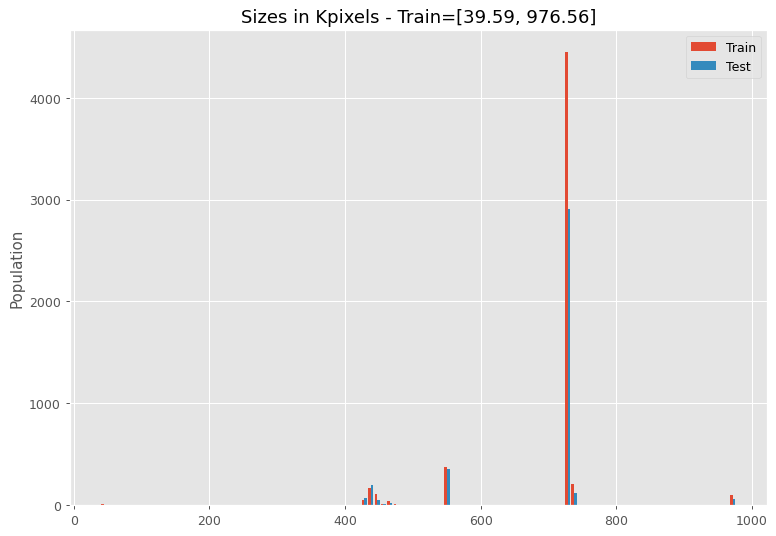

In [12]:
#  ------ Statistics / sizes
fig = plt.figure(figsize=(10, 7), dpi=90)
plt.hist([train_size,test_size], bins=100)
plt.gca().set(
    title='Sizes in Kpixels - Train=[{:5.2f}, {:5.2f}]'.format(min(train_size),max(train_size)), 
    ylabel='Population', 
)
plt.legend(['Train','Test'])
plt.show()

In [13]:
fig.savefig('sizes.png',bbox_inches='tight')

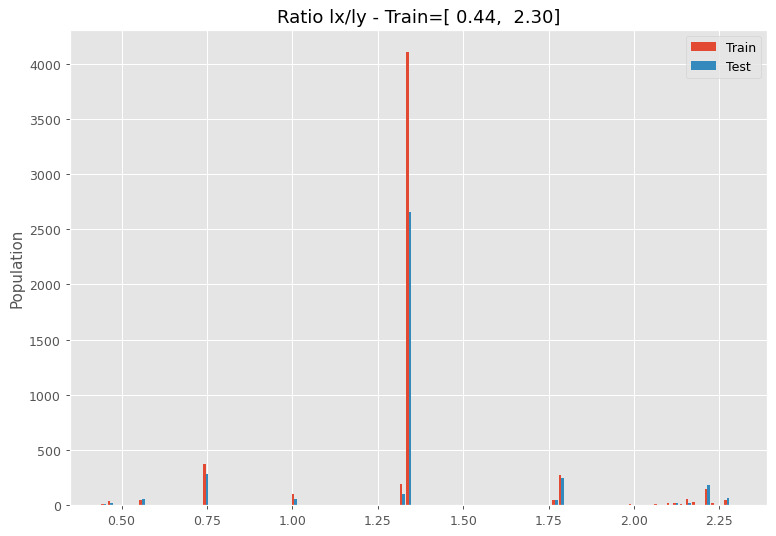

In [14]:
# ------ Statistics / ratio lx/ly
fig = plt.figure(figsize=(10, 7), dpi=90)
plt.hist([train_ratio,test_ratio], bins=100)
plt.gca().set(title='Ratio lx/ly - Train=[{:5.2f}, {:5.2f}]'.format(min(train_ratio),max(train_ratio)), 
              ylabel='Population'
)
plt.legend(['Train','Test'])
plt.show()

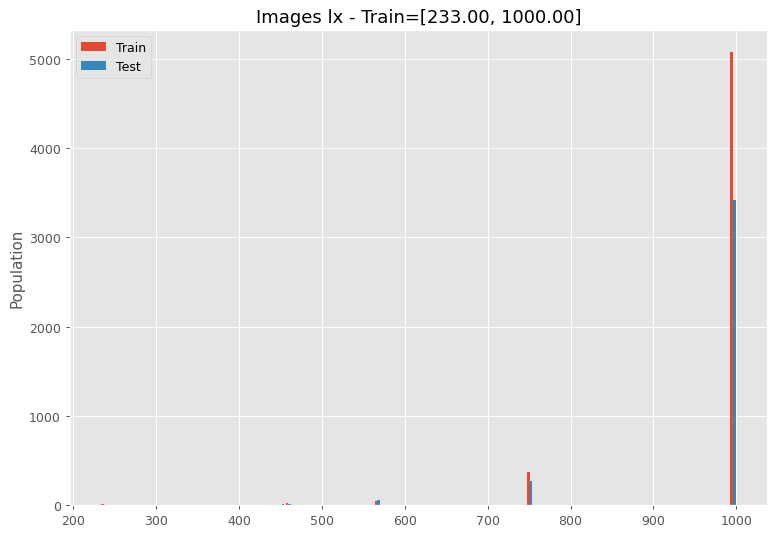

In [15]:
# ------ Statistics / lx
fig = plt.figure(figsize=(10, 7), dpi=90)
plt.hist([train_lx,test_lx], bins=100)
plt.gca().set(title='Images lx - Train=[{:5.2f}, {:5.2f}]'.format(min(train_lx),max(train_lx)), 
              ylabel='Population'
)
plt.legend(['Train','Test'])
plt.show()

In [16]:
fig.savefig('width.png',bbox_inches='tight')

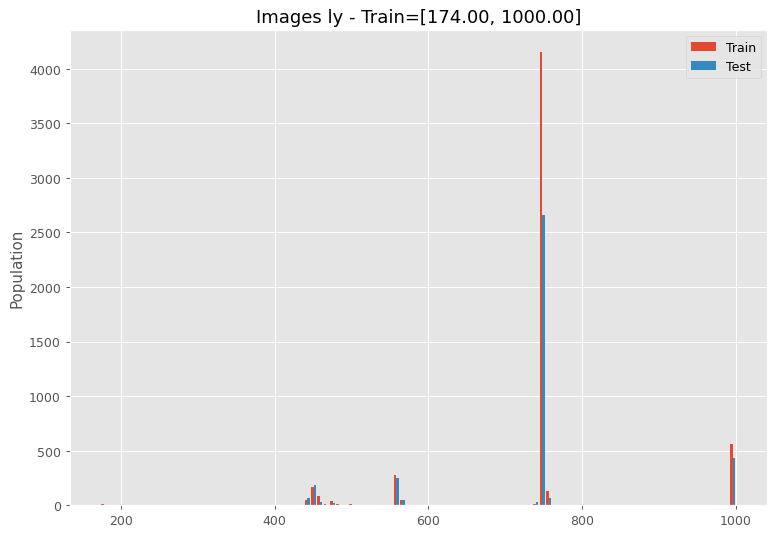

In [17]:
# ------ Statistics / ly
fig = plt.figure(figsize=(10, 7), dpi=90)
plt.hist([train_ly,test_ly], bins=100)
plt.gca().set(title='Images ly - Train=[{:5.2f}, {:5.2f}]'.format(min(train_ly),max(train_ly)), 
              ylabel='Population'
)
plt.legend(['Train','Test'])
plt.show()

In [18]:
fig.savefig('ly.png',bbox_inches='tight')

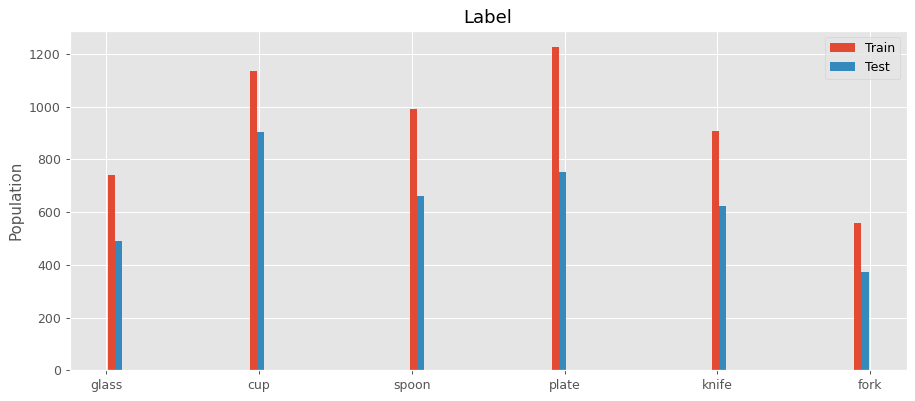

In [19]:
# ------ Statistics / Label
fig = plt.figure(figsize=(12,5), dpi=90)
plt.hist([train_df['label'],submit_df['label']], bins=43)
plt.gca().set(title='Label', ylabel='Population')
plt.legend(['Train','Test'])
plt.show()

In [20]:
fig.savefig('labels.png',bbox_inches='tight')